<strong> TMDB 5000 Movie Dataset
Metadata on ~5,000 movies from TMDb </strong>
<p>What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?</p>

<p>This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films. </p>


**Data Description**
**id** - Integer unique id of each movie

**belongs_to_collection** - Contains the TMDB Id, Name, Movie Poster and Backdrop URL  of a movie in JSON format. You can see the Poster and Backdrop Image like this: https://image.tmdb.org/t/p/original/<Poster_path_here>. Example: https://image.tmdb.org/t/p/original//iEhb00TGPucF0b4joM1ieyY026U.jpg

**budget**:Budget of a movie in dollars. 0 values mean unknown. 

**genres** : Contains all the Genres Name & TMDB Id in JSON Format

**homepage** - Contains the official homepage URL of a movie. Example: http://sonyclassics.com/whiplash/	, this is the homepage of Whiplash movie.

**imdb_id** - IMDB id of a movie (string). You can visit the IMDB Page like this: https://www.imdb.com/title/<imdb_id_here>

**original_language** - Two digit code of the original language, in which the movie was made. Like: en = English, fr = french. 

**original_title** - The original title of a movie. Title & Original title may differ, if the original title is not in English. 

**overview** - Brief description of the movie.

**popularity** -  Popularity of the movie in float. 

**poster_path** - Poster path of a movie. You can see the full image like this: https://image.tmdb.org/t/p/original/<Poster_path_here>

**production_companies** - All production company name and TMDB id in JSON format of a movie.

**production_countries** - Two digit code and full name of the production company in JSON format.

**release_date** - Release date of a movie in mm/dd/yy format.

**runtime** - Total runtime of a movie in minutes (Integer).

**spoken_languages** - Two digit code and full name of the spoken language. 

**status** - Is the movie released or rumored? 

**tagline** - Tagline of a movie 

**title** - English title of a movie

**Keywords** - TMDB Id and name of all the keywords in JSON format. 

**cast** - All cast TMDB id, name, character name, gender (1 = Female, 2 = Male) in JSON format

**crew** - Name, TMDB id, profile path of various kind of crew members job like Director, Writer, Art, Sound etc. 

**revenue** - Total revenue earned by a movie in dollars. 

In [1]:
import numpy as np
import json
import datetime
from wordcloud import WordCloud
from math import floor
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(15,8)})

import warnings
warnings.filterwarnings("ignore")


In [2]:
movie_df = pd.read_csv('data/movies/tmdb_5000_movies.csv')
credits_df = pd.read_csv('data/movies/tmdb_5000_credits.csv')

#combine

In [3]:
movie_df.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits_df.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Preprocessing stage

In [5]:
combine = pd.merge(movie_df, credits_df, left_on = 'id', right_on = 'movie_id') #merge by id

In [6]:
def process_df(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    json_cols = ['genres', 'keywords', 'production_countries', \
                 'production_companies', 'spoken_languages', 'cast', 'crew']
    for col in json_cols:
        df[col] = df[col].apply(json.loads) #Load the JSON columns
    return df
final_movies_df = process_df(combine)
del final_movies_df['movie_id'], final_movies_df['id'] #No need for the id of the movies once the tables are joined
del final_movies_df['title_x'] #not needed (rendundancy of two titles because of merge)

In [7]:
final_movies_df.head()

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [8]:
del final_movies_df["tagline"]  
#we will need the homepage corrolation later on
final_movies_df['has_homepage'] = 0
final_movies_df.loc[final_movies_df['homepage'].isnull() == False, 'has_homepage'] = 1
final_movies_df = final_movies_df.drop(['homepage'], axis = 1) #no need for the link anymore

In [9]:
final_movies_df.loc[final_movies_df["budget"] == 0.0, "budget"] = final_movies_df["budget"].mean() #mean for null values
final_movies_df.loc[final_movies_df["runtime"] == 0.0, "runtime"] = final_movies_df["runtime"].mean() #mean for null values

In [10]:
final_movies_df.rename(columns={'title_y':'title'}, inplace=True) #rename col
final_movies_df = final_movies_df[final_movies_df['status'] == 'Released'] #keep only released movies
del final_movies_df['status'], final_movies_df['original_title'] #no need for these columns anymore

In [11]:
final_movies_df["year"] = final_movies_df["release_date"].dt.year #get year
final_movies_df["month"] = final_movies_df["release_date"].dt.month #get month 
final_movies_df["day"] = final_movies_df["release_date"].dt.day #get day
final_movies_df["dow"] = final_movies_df["release_date"].dt.dayofweek #get dow for visualization
final_movies_df["profit"] = final_movies_df["revenue"] - final_movies_df["budget"] #calculate profit

In [12]:
def extract_decade(x):
    return str(floor(x/10)*10)+"s"
final_movies_df= final_movies_df.fillna(0)
final_movies_df["decade"] = final_movies_df["year"].apply(extract_decade)
final_movies_df = final_movies_df[(final_movies_df['decade'] != '1910s') & (final_movies_df['decade'] != '0s')] #outliers
final_movies_df = final_movies_df.sort_values(by=['decade'], ascending=True)

### Most popular movie prior to 2015

In [13]:
pop = final_movies_df["popularity"].idxmax()
print(final_movies_df.loc[pop][['title','profit','year','vote_average']])

title                Minions
profit          1082730962.0
year                  2015.0
vote_average             6.4
Name: 546, dtype: object


### Average run time

In [14]:
print('The average run time is {:.2f}'.format(final_movies_df["runtime"].mean()))

The average run time is 107.61


### Top 10 movies with the Highest average votes

In [15]:
top = final_movies_df.nlargest(10,'vote_average')
print('Most voted')
top[['title','year','vote_average']]

Most voted


,title,year,vote_average
3519,Stiff Upper Lips,1998.0,10.0
4045,"Dancer, Texas Pop. 81",1998.0,10.0
4247,Me You and Five Bucks,2015.0,10.0
3992,Sardaarji,2015.0,9.5
2386,One Man's Hero,1999.0,9.3
1881,The Shawshank Redemption,1994.0,8.5
2970,There Goes My Baby,1994.0,8.5
2796,The Prisoner of Zenda,1937.0,8.4
3337,The Godfather,1972.0,8.4
2731,The Godfather: Part II,1974.0,8.3


###  Top 10 movies with the highest profits

In [16]:
most_profits = final_movies_df.nlargest(10,'profit')
most_profits[['title','profit','year','vote_average']]

,title,profit,year,vote_average
0,Avatar,2.550965e+09,2009.0,7.2
25,Titanic,1.645034e+09,1997.0,7.5
28,Jurassic World,1.363529e+09,2015.0,6.5
44,Furious 7,1.316249e+09,2015.0,7.3
16,The Avengers,1.299558e+09,2012.0,7.4
7,Avengers: Age of Ultron,1.125404e+09,2015.0,7.3
124,Frozen,1.124219e+09,2013.0,7.3
546,Minions,1.082731e+09,2015.0,6.4
329,The Lord of the Rings: The Return of the King,1.024889e+09,2003.0,8.1
31,Iron Man 3,1.015440e+09,2013.0,6.8


### Profits per year

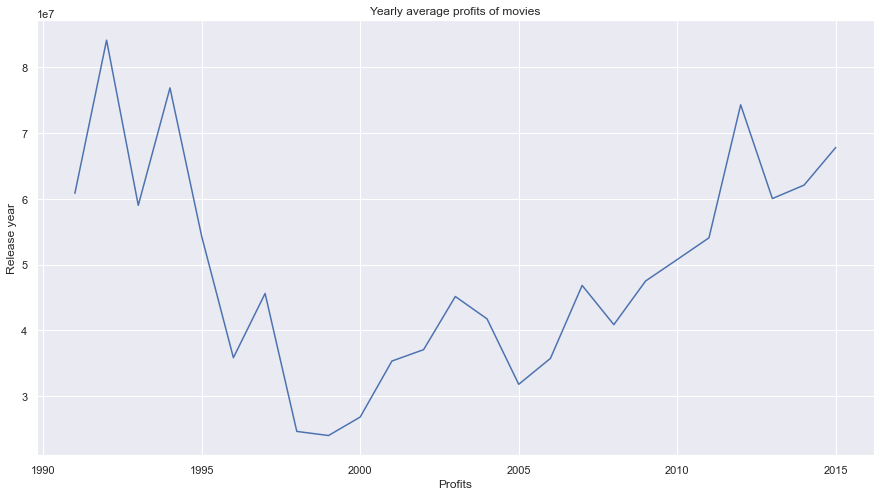

In [17]:
profits_per_year = final_movies_df[(final_movies_df["year"]>1990) & (final_movies_df["year"] <2016)].groupby("year").agg({"profit":"mean"})
profits_per_year.index = profits_per_year.index.astype(int)

sns.lineplot(x='year',y='profit',data=profits_per_year)
plt.xlabel('Profits')
plt.ylabel('Release year')
plt.title('Yearly average profits of movies')
plt.show()

### Visualize profit per day of week

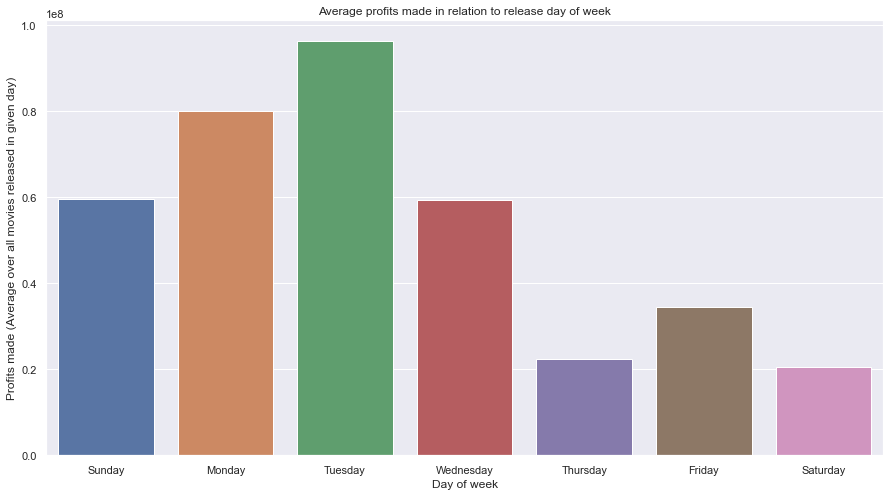

In [18]:
profit_by_dow = final_movies_df[final_movies_df["year"]>1990].groupby(["dow"]).profit.mean().reset_index()
days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
sns.barplot(x=days,y='profit',data=profit_by_dow)
plt.xlabel('Day of week')
plt.ylabel('Profits made (Average over all movies released in given day)')
plt.title('Average profits made in relation to release day of week')
plt.show()

### Vote counts per decade

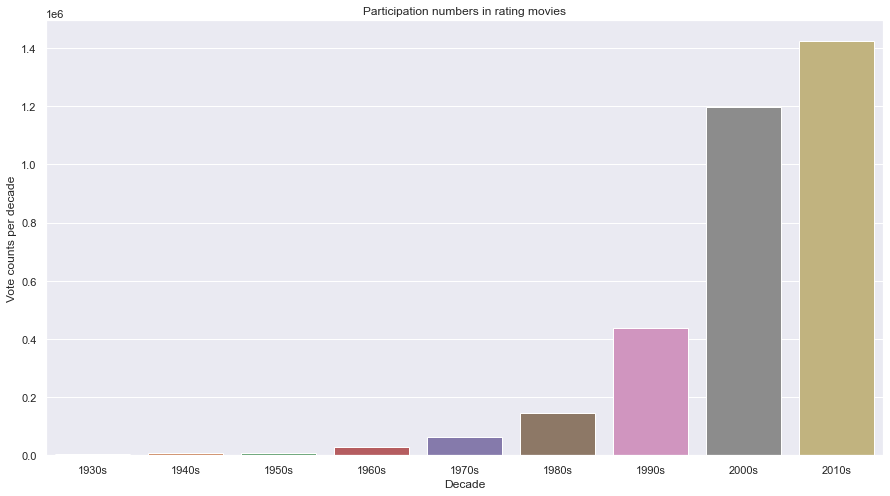

In [19]:
df = final_movies_df #temp manipulation
df_by_vote = df.groupby(['decade']).vote_count.sum().reset_index()[1:] #remove 0s decade
sns.barplot(x='decade',y='vote_count',data=df_by_vote)
plt.xlabel('Decade')
plt.ylabel('Vote counts per decade')
plt.title('Participation numbers in rating movies')
plt.show()

### average ratings per year

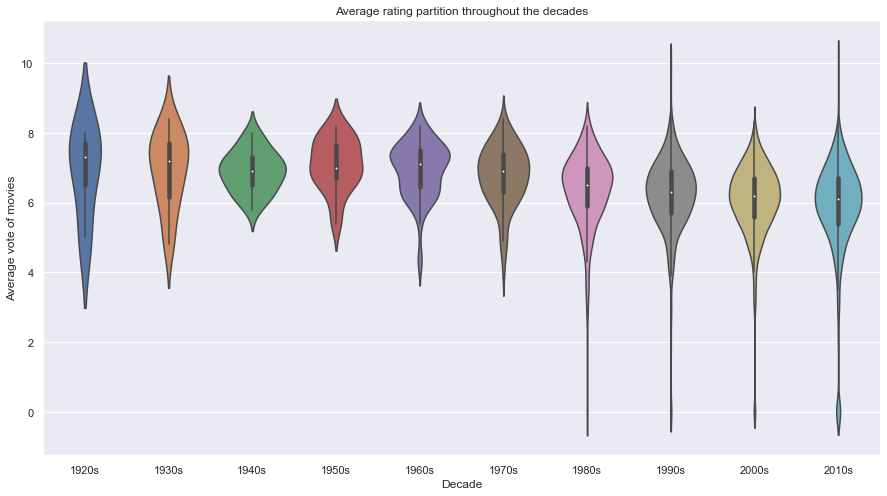

In [20]:
sns.violinplot(x='decade',y='vote_average',data=final_movies_df)
plt.title('Average rating partition throughout the decades')
plt.xlabel('Decade')
plt.ylabel('Average vote of movies')
plt.show()

### Let's make a wordcloud of genres

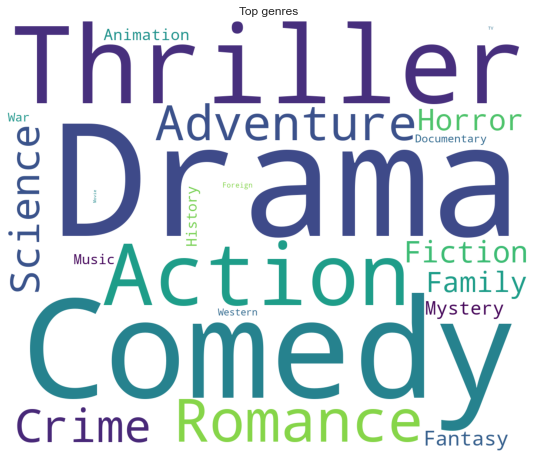

In [21]:
list_of_genres = list(final_movies_df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values) #Our columns are now lists with dictionnaries embedded (we extract the names from them)
plt.figure(figsize = (12, 8))
text = ' '.join([i for j in list_of_genres for i in j])
# print(text)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top genres')
plt.axis("off")
plt.show()

### Does the homepage existence affect revenues? (It appears that it does due to marketing visibility)

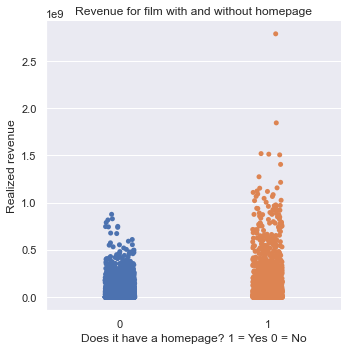

In [22]:
sns.catplot(x='has_homepage', y='revenue', data=final_movies_df)
plt.title('Revenue for film with and without homepage')
plt.xlabel('Does it have a homepage? 1 = Yes 0 = No')
plt.ylabel('Realized revenue')
plt.show()